In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv("BX-Books.csv", sep=';', encoding="latin-1", error_bad_lines=False)
users = pd.read_csv("BX-Users.csv", sep=';', encoding="latin-1", error_bad_lines=False)
ratings = pd.read_csv("BX-Book-Ratings.csv", sep=';', encoding="latin-1", error_bad_lines=False)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Sankalp\anaconda3\lib\site-packages\IPython\core\interactiveshell

In [3]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
books.rename(columns = {'Book-Title':'Title', 'Book-Author':'Author', 'Year-Of-Publication':'Year', 'Publisher':'Publisher'}, inplace=True)
users.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

In [5]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 5)
(278858, 3)
(1149780, 3)


In [6]:
books.describe()

,ISBN,Title,Author,Year,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


we observe 1 missing value in 'author' column and 2 in 'publisher'. 
Top author is Agatha Christie and Harlequin is the top publisher.

In [7]:
users.describe()

,user_id,age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


We observe the age values are not clean and will deal with it. Age shoud ot be more than 100 and minimum should also be set.

In [8]:
users.age.value_counts()

24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
168.0       1
132.0       1
159.0       1
186.0       1
127.0       1
Name: age, Length: 165, dtype: int64

<AxesSubplot:xlabel='age'>

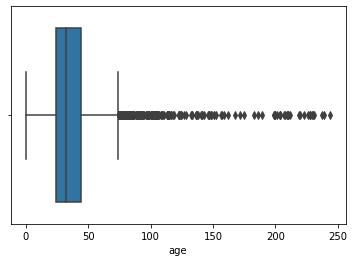

In [9]:
sns.boxplot(users['age'])

In [10]:
#Removing users with age greater than 100

In [11]:
index_names = users[ users['age']> 100].index
users.drop(index_names, inplace = True)

    

In [12]:
books['Year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [14]:
books[books["Year"].isin(["DK Publishing Inc","Gallimard"])]

,ISBN,Title,Author,Year,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


Replacing the values for above 3 records by correct values

In [36]:
books.loc[[209538], 0:5] = '078946697X','DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)','Michael Teitelbaum',2000,'DK Publishing Inc'
books.loc[[220731], 0:5] = '2070426769','DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)','James Buckley',2000,'DK Publishing Inc'
books.loc[[221678], 0:5] = '0789466953', "Peuple du ciel, suivi de 'Les Bergers",'Jean-Marie Gustave Le ClÃ?Â©zio',2003,'Gallimard'

C:\Users\Ronil\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [14]:
ratings.describe()

,user_id,rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [38]:
ratings.rating.value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: rating, dtype: int64

In [39]:
sum(ratings['user_id'].value_counts()>=3000)

10

There are 10 users who have rated more than 3000 books that looks suspicious, we will get rid of such users.

In [40]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

Text(0.5, 1.0, 'Age Outliers')

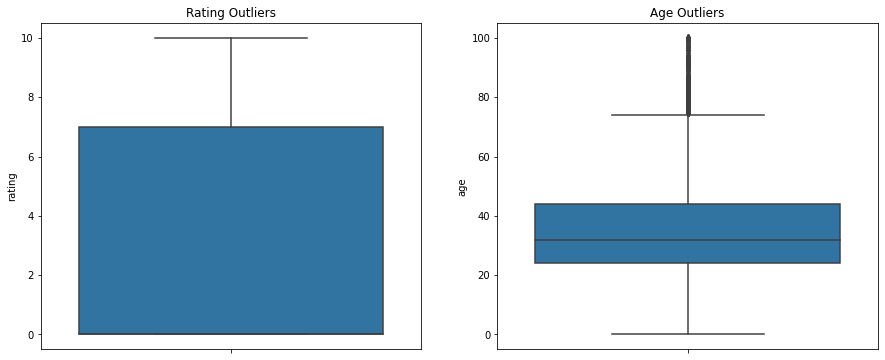

In [41]:
f,ax=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(y='rating', data=ratings,ax=ax[0])
ax[0].set_title('Rating Outliers')
sns.boxplot(y='age', data=users,ax=ax[1])
ax[1].set_title('Age Outliers')

We do observe a lot of outliers in age column and will clean the data.

In [42]:
len(users.location.unique())

57251

There are 57339 unique location. Will create a country column so that we can group the data.

In [43]:
for u in users:
    users['Country']=users.location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')  

We have unique 530 countries that looks spurious. We will clean country column data.

In [44]:
users.isnull().sum()

user_id          0
location         0
age         110762
Country        367
dtype: int64

There are 110762 null age values and 368 entries with null country

In [45]:
users.loc[users.Country.isnull(),'Country']='other'

The null countries will have 'other' as entry.

In [46]:
pd.crosstab(users.Country,ratings.rating).T.style.background_gradient()

In [47]:
users['Country'].replace(['','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Ten countries with max number of users

In [49]:
cm=sns.light_palette('green',as_cmap=True)
popular=users.Country.value_counts().to_frame()[:10]
popular.rename(columns={'Country':'Count_Users_Country'},inplace=True)
popular.style.background_gradient(cmap=cm)

,Count_Users_Country
usa,139635
canada,21645
united kingdom,18514
germany,17019
spain,13234
australia,12906
italy,11273
other,4951
france,3479
portugal,3385


Only consider data with age column between 5-90

In [50]:
# outlier data became NaN
users.loc[(users.age > 90 ) | (users.age < 5),'age']=np.nan

<AxesSubplot:ylabel='Frequency'>

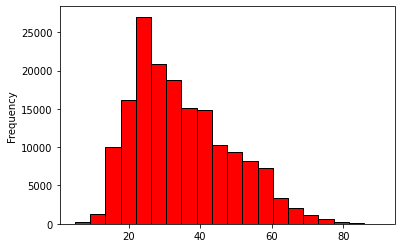

In [51]:
users.age.plot.hist(bins=20,edgecolor='black',color='red')

extract users who have atleats rated 100 and less than 3000 books

In [52]:
x = ratings['user_id'].value_counts().between(100, 3000)
y = x[x].index  #user_ids
print(y.shape)
ratings = ratings[ratings['user_id'].isin(y)]

(1837,)


In [53]:
ratings.shape

(600951, 3)

In [54]:
book_ratings = ratings.merge(books, on='ISBN')
book_ratings.head()

,user_id,ISBN,rating,Title,Author,Year,Publisher
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [55]:
book_ratings.shape

(553977, 7)

count the rating of each book so we will group data based on title and aggregate based on rating.

In [56]:
number_of_rating = book_ratings.groupby('Title')['rating'].count().reset_index()
number_of_rating.rename(columns= {'rating':'number_of_ratings'}, inplace=True)

In [57]:
final_rating = book_ratings.merge(number_of_rating, on='Title')
print(final_rating.shape)
final_rating.dtypes

(553977, 8)


user_id               int64
ISBN                 object
rating                int64
Title                object
Author               object
Year                 object
Publisher            object
number_of_ratings     int64
dtype: object

Extract books that have received more than 50 ratings.Drop duplicate values because if the same user has rated the same book multiple times so it will create a problem

In [58]:
final_rating = final_rating[final_rating['number_of_ratings'] >= 20]
final_rating.drop_duplicates(['user_id','Title'], inplace=True)

In [59]:
final_rating

,user_id,ISBN,rating,Title,Author,Year,Publisher,number_of_ratings
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,103
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,103
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,103
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,103
4,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,103
...,...,...,...,...,...,...,...,...
422934,224809,1880418568,0,"Wolves of the Calla (The Dark Tower, Book 5)",Stephen King,2003,Donald M. Grant/Scribner,20
422935,236283,1880418568,0,"Wolves of the Calla (The Dark Tower, Book 5)",Stephen King,2003,Donald M. Grant/Scribner,20
422936,242083,1880418568,7,"Wolves of the Calla (The Dark Tower, Book 5)",Stephen King,2003,Donald M. Grant/Scribner,20
422937,251140,1880418568,0,"Wolves of the Calla (The Dark Tower, Book 5)",Stephen King,2003,Donald M. Grant/Scribner,20


In [61]:
final_rating.shape

(171850, 8)

In [67]:
sample_data = final_rating.loc[0:1100]

In [68]:
sample_data

(997, 8)

In [69]:
sample_data.to_excel('sample_data.xlsx')

Get Books Based on User Similarity

In [70]:
user_item_matrix = final_rating.pivot_table(index='user_id',columns='Title',values='rating')
user_item_matrix.fillna(0,inplace=True)
user_item_matrix.shape

(1808, 3801)

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
user_user_sim_matrix = pd.DataFrame(cosine_similarity(user_item_matrix))
user_user_sim_matrix.head()

C:\Users\Ronil\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


,0,1,2,3,4,5,6,7,8,9,...,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807
0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.0,1.000000,0.141559,0.0,0.0,0.000000,0.000000,0.0,0.178907,0.0,...,0.079499,0.0,0.05801,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.141559,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.028811,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.040592,0.135939,0.046807,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,1.0,0.053424,0.000000,0.0,0.000000,0.0,...,0.032002,0.0,0.00000,0.037269,0.000000,0.000000,0.0,0.0,0.058671,0.0


In [72]:
user_user_sim_matrix.columns = user_item_matrix.index


In [73]:
user_user_sim_matrix.index=user_item_matrix.index
user_user_sim_matrix

user_id,183,254,507,882,1424,1435,1733,1903,2033,2110,...,275970,276018,276463,276680,276925,277427,277478,277639,278137,278188
user_id,,,,,,,,,,,,,,,,,,,,,
183,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
254,0.0,1.000000,0.141559,0.000000,0.000000,0.000000,0.000000,0.0,0.178907,0.0,...,0.079499,0.0,0.05801,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
507,0.0,0.141559,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
882,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.028811,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.040592,0.135939,0.046807,0.0,0.0,0.000000,0.0
1424,0.0,0.000000,0.000000,0.000000,1.000000,0.053424,0.000000,0.0,0.000000,0.0,...,0.032002,0.0,0.00000,0.037269,0.000000,0.000000,0.0,0.0,0.058671,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277427,0.0,0.000000,0.000000,0.046807,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.021243,0.0,0.00000,0.084178,0.165114,1.000000,0.0,0.0,0.000000,0.0
277478,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0
277639,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.00000,0.046186,0.000000,0.000000,0.0,1.0,0.000000,0.0


In [74]:
def getSimilarUsers(user_id):
    test=user_user_sim_matrix.loc[user_id].sort_values(ascending = False)
    tdf=pd.DataFrame(test)
    tdf.columns=['similarity']
    index=tdf.iloc[0:5].index
    return index

In [75]:
def getBooksBasedOnSimilarUser(user_id):
    test=getSimilarUsers(user_id)
    items = set(user_item_matrix.loc[test[0]].iloc[user_item_matrix.loc[test[0]].to_numpy().nonzero()].index)
    setBook=set()
    for i in range(1,5):
        items1 = set(user_item_matrix.loc[test[i]].iloc[user_item_matrix.loc[test[i]].to_numpy().nonzero()].index)
        for i in items1:
            setBook.add(i)
    recom_books=setBook-items
    return recom_books 

In [76]:
def getTopfiveBookswithRatings(user_id):
    bookset=getBooksBasedOnSimilarUser(user_id)
    map={}
    for i in bookset:
        ratings=user_item_matrix[i]
        j=0
        counter=0
        for k in ratings:
            if k>0:
                j+=k
                counter+=1
        avg=j/counter
        map[i]=avg
    sorted_x = sorted(map.items(), key=lambda kv: kv[1],reverse=True)[:5]
    return sorted_x

In [77]:
print("Input User Id")
userid=int(input())

bookwith_rating=getTopfiveBookswithRatings(userid)
finalRecoUU=pd.DataFrame(bookwith_rating)
finalRecoUU.columns=['Title','Ratings']
finalRecoUU  

Input User Id
277427


,Title,Ratings
0,All I Need to Know I Learned from My Cat,8.545455
1,Nickel and Dimed: On (Not) Getting By in America,8.127273
2,Big Stone Gap: A Novel (Ballantine Reader's Ci...,7.967742
3,The Poisonwood Bible: A Novel,7.738095
4,Love Story,7.461538


Cold Start

In [78]:
item_item_matrix = final_rating.pivot_table(index='Title',columns='user_id',values='rating')
item_item_matrix.fillna(0,inplace=True)
item_item_matrix

user_id,183,254,507,882,1424,1435,1733,1903,2033,2110,...,275970,276018,276463,276680,276925,277427,277478,277639,278137,278188
Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(item_item_matrix))
item_item_sim_matrix.head()

C:\Users\Ronil\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


,0,1,2,3,4,5,6,7,8,9,...,3791,3792,3793,3794,3795,3796,3797,3798,3799,3800
0,1.0,0.0,0.00000,0.0,0.00000,0.031537,0.258235,0.0,0.162484,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,1.0,0.00000,0.0,0.00000,0.118088,0.000000,0.0,0.051189,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.086184,0.0,0.000000,0.000000
2,0.0,0.0,1.00000,0.0,0.05493,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.157295,0.0,0.000000,0.000000
3,0.0,0.0,0.00000,1.0,0.00000,0.047885,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.084135,0.0,0.000000,0.000000
4,0.0,0.0,0.05493,0.0,1.00000,0.054842,0.094724,0.0,0.000000,0.0,...,0.0,0.06435,0.0,0.0,0.0,0.038966,0.024423,0.0,0.068332,0.068182


In [80]:
item_item_sim_matrix.columns = item_item_matrix.index
item_item_sim_matrix.index=item_item_matrix.index
item_item_sim_matrix.rename(index={1:'Title'})
item_item_sim_matrix.head()

Title,'Salem's Lot,10 Lb. Penalty,101 Dalmatians,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,...,Your Oasis on Flame Lake (Ballantine Reader's Circle),Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zia,Zlata's Diary: A Child's Life in Sarajevo,Zombies of the Gene Pool,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,stardust
Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,1.0,0.0,0.00000,0.0,0.00000,0.031537,0.258235,0.0,0.162484,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
10 Lb. Penalty,0.0,1.0,0.00000,0.0,0.00000,0.118088,0.000000,0.0,0.051189,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.086184,0.0,0.000000,0.000000
101 Dalmatians,0.0,0.0,1.00000,0.0,0.05493,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.157295,0.0,0.000000,0.000000
16 Lighthouse Road,0.0,0.0,0.00000,1.0,0.00000,0.047885,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.084135,0.0,0.000000,0.000000
1984,0.0,0.0,0.05493,0.0,1.00000,0.054842,0.094724,0.0,0.000000,0.0,...,0.0,0.06435,0.0,0.0,0.0,0.038966,0.024423,0.0,0.068332,0.068182


In [81]:
def getSimilarTitles(title):
    simbook=set()
    for i in title:
        test=item_item_sim_matrix.loc[i].sort_values(ascending = False)
        tdf=pd.DataFrame(test)
        tdf.columns=['similarity']
        index=tdf.iloc[1:4].index
        for i in range(0,3):
            simbook.add(index[i])
    return simbook-title

In [82]:

def returnUserPref():
    test=set()
    print("input book Titles:")
    for i in range(0,3):
        
        test.add(input())
    return test

Input these 3 tiles one by one #'Animal Farm','Lord of the Flies','The Catcher in the Rye'

In [83]:
test123=returnUserPref()
test345=getSimilarTitles(test123)
test1234=pd.DataFrame(test345)
test1234.columns=['RecomBooks']
test1234

input book Titles:
Animal Farm
Lord of the Flies
The Catcher in the Rye


,RecomBooks
0,1984
1,Mrs. Frisby and the Rats of Nimh
2,The Hitchhiker's Guide to the Galaxy
3,Brave New World
4,Franny and Zooey
5,Midnight in the Garden of Good and Evil
6,The Color Purple
7,Macbeth
8,High Fidelity


Filtering based on selected user preference - prefered author

In [84]:
basedOnUser=final_rating.pivot_table(index=['Author','Title'],values='number_of_ratings')
basedOnUser

number_of_ratings
Author                Title                                                                
A. L. Singer          Bingo                                                              32
A. M. Jenkins         Damage                                                             22
A. Manette Ansay      Midnight Champagne : A Novel (Mysteries &amp; H...                 21
                      Vinegar Hill (Oprah's Book Club (Paperback))                      128
A. N. Roquelaure      Beauty's Release                                                   33
...                                                                                     ...
Zilpha Keatley Snyder The Egypt Game (Yearling Newbery)                                  26
Zlata Filipovic       Zlata's Diary: A Child's Life in Sarajevo                          33
Zora Neale Hurston    Their Eyes Were Watching God                                       32
                      Their Eyes Were Watching God: A Novel                              49
johanna spyri         Heidi                                                              22

[5291 rows x 1 columns]

In [85]:
test1234=basedOnUser.swaplevel()
test1234.loc['Harry Potter and the Order of the Phoenix (Book 5)']

,number_of_ratings
Author,
J. K. Rowling,153


In [86]:
basedOnUser.loc['J. K. Rowling']

,number_of_ratings
Title,
Fantastic Beasts and Where to Find Them,20
Harry Potter and the Chamber of Secrets (Book 2),246
Harry Potter and the Chamber of Secrets Postcard Book,32
Harry Potter and the Goblet of Fire (Book 4),171
Harry Potter and the Order of the Phoenix (Book 5),153
Harry Potter and the Prisoner of Azkaban (Book 3),193
Harry Potter and the Sorcerer's Stone (Book 1),121
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),241


Content-based filtering on prefered book

In [87]:
def contentBased(bookname):
    basedOnUser=final_rating.pivot_table(index=['Author','Title'],values='number_of_ratings')
    test1234=basedOnUser.swaplevel()
    auth=test1234.loc[bookname]
    return basedOnUser.loc[auth.index]
    
    
    

In [88]:
def getContentBasedReco(bookname):
    test=contentBased(bookname)
    test.sort_values(by='number_of_ratings',ascending=False)
    test123=test.swaplevel()
    test788=pd.DataFrame(test123)
    test5657=test788.reset_index()
    list45=test5657['Title']
    newlist=[]
    for i in list45:
        if i!=bookname:
            newlist.append(i)
    return newlist
        

Recommended books based on prefered title

Input Book Name "A Painted House"

In [89]:
print("Input book Name")
book=input()
recoContent=getContentBasedReco(book)
recoContent

Input book Name
A Painted House


['A Time to Kill',
 'Bleachers',
 'Skipping Christmas',
 'The Brethren',
 'The Firm',
 'The King of Torts',
 'The Last Juror',
 'The Pelican Brief',
 'The Rainmaker',
 'The Runaway Jury',
 'The Street Lawyer',
 'A Time to Kill',
 'Bleachers',
 'Skipping Christmas',
 'The Brethren',
 'The Chamber',
 'The Client',
 'The Firm',
 'The King of Torts',
 'The Last Juror',
 'The Partner',
 'The Pelican Brief',
 'The Rainmaker',
 'The Runaway Jury',
 'The Street Lawyer',
 'The Summons',
 'The Testament']

In [90]:
test=user_item_matrix.columns
test

Index([''Salem's Lot', '10 Lb. Penalty', '101 Dalmatians',
       '16 Lighthouse Road', '1984', '1st to Die: A Novel',
       '2010: Odyssey Two', '204 Rosewood Lane', '2061: Odyssey Three',
       '24 Hours',
       ...
       'Your Oasis on Flame Lake (Ballantine Reader's Circle)',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zia', 'Zlata's Diary: A Child's Life in Sarajevo',
       'Zombies of the Gene Pool', 'Zoya', '\O\" Is for Outlaw"',
       '\Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"',
       'e', 'stardust'],
      dtype='object', name='Title', length=3801)

In [92]:
map={}
for i in test:
    ratings=user_item_matrix[i]
    j=0
    counter=0
    for k in ratings:
        if k>0:
            j+=k
            counter+=1
    if counter >0:
        avg=j/counter
        map[i]=avg
sorted_x = sorted(map.items(), key=lambda kv: kv[1],reverse=True)[:10]

Recom=pd.DataFrame(sorted_x)
Recom.columns=['Titles','Ratings']
Recom

,Titles,Ratings
0,A Walk Across America,10.0
1,Blessing in Disguise,10.0
2,Flowers from the Storm,10.0
3,Golden Cup,10.0
4,Mirage,10.0
5,Natural California: A Postcard Book,10.0
6,Sudden Death,10.0
7,The Borrowers,10.0
8,The Deceiver,10.0
9,The First Man in Rome,10.0
